170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


100%|██████████| 170M/170M [00:03<00:00, 43.2MB/s]


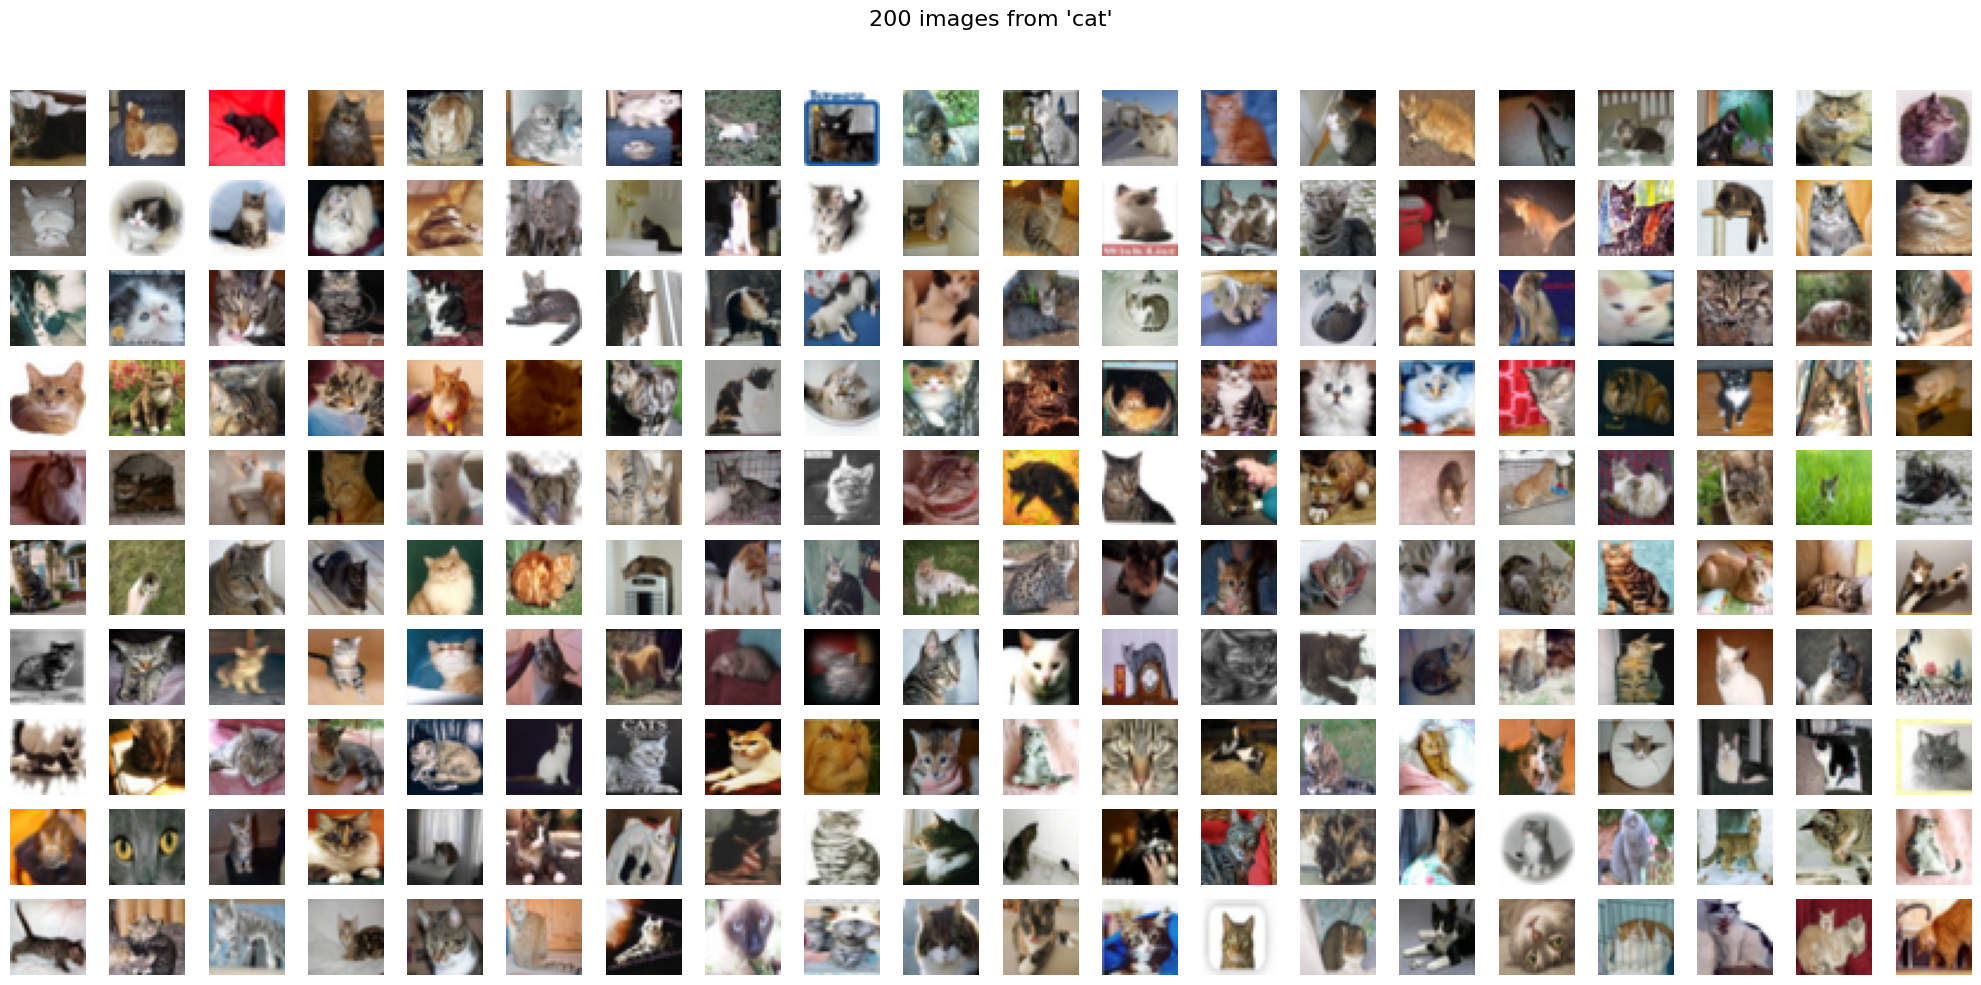

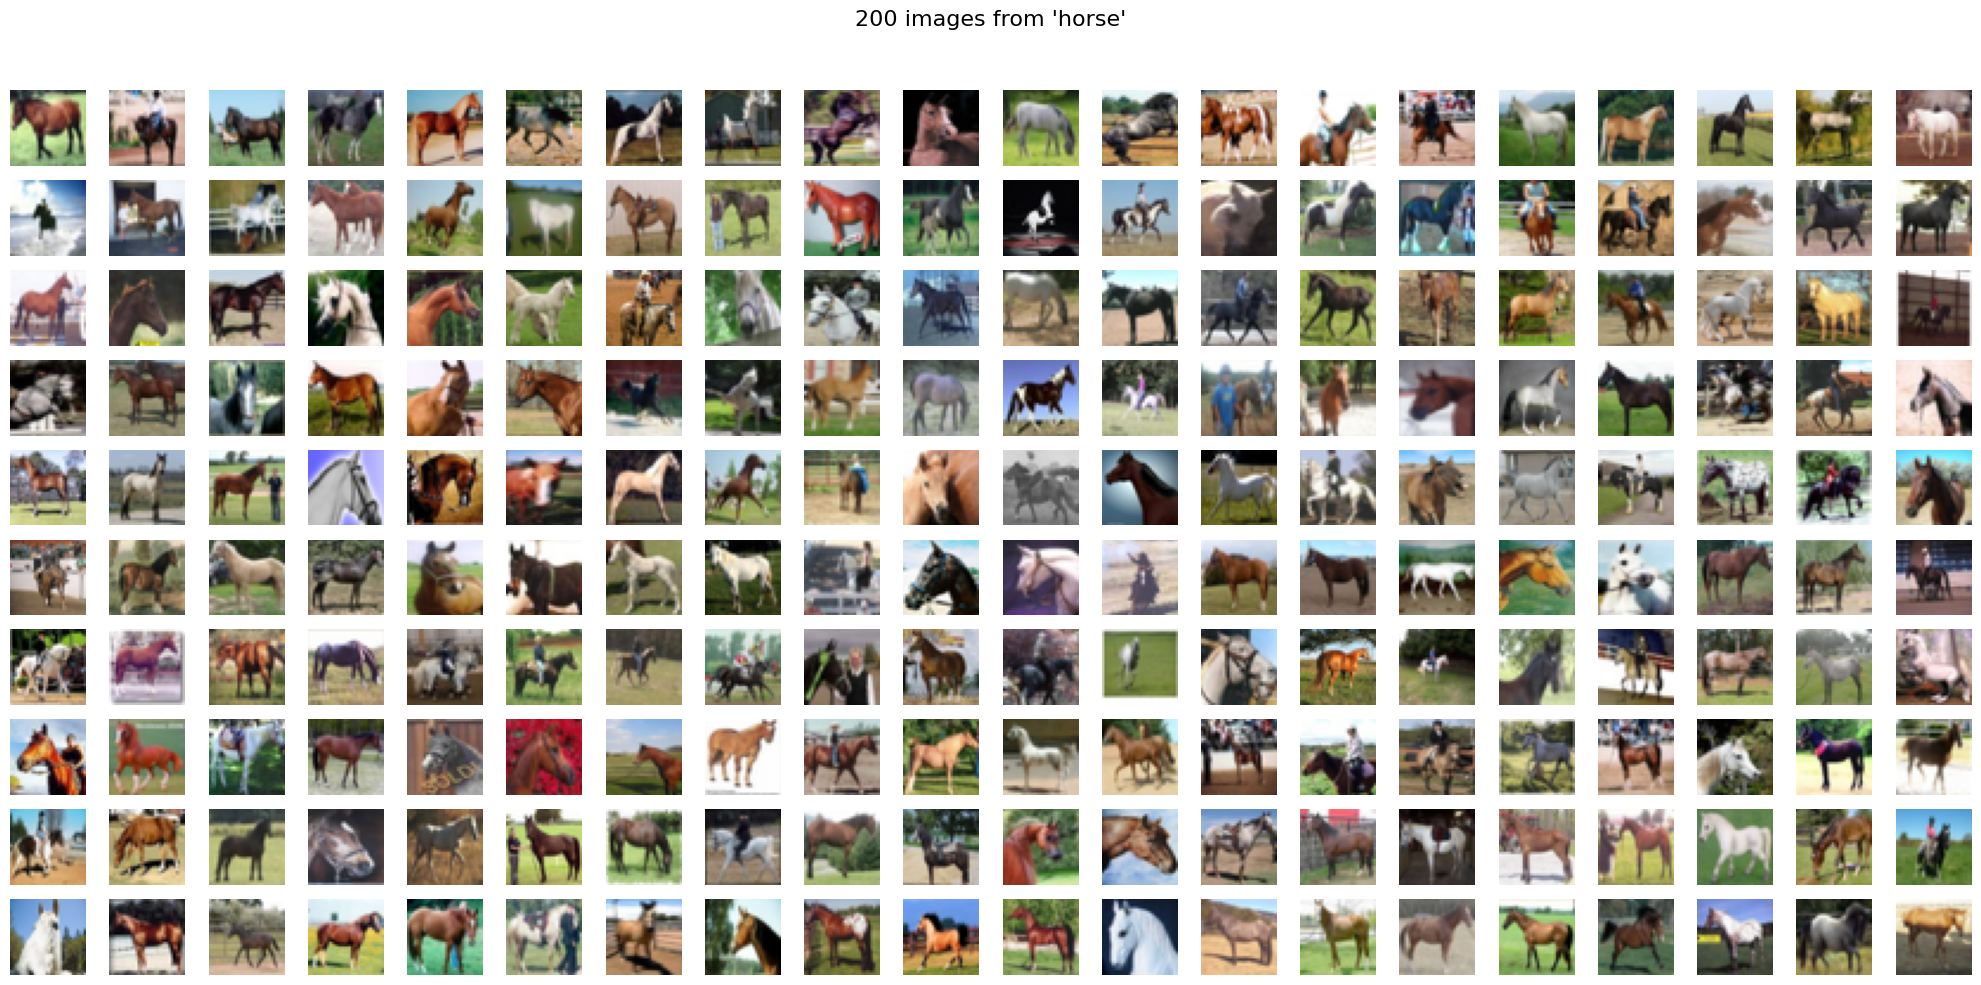

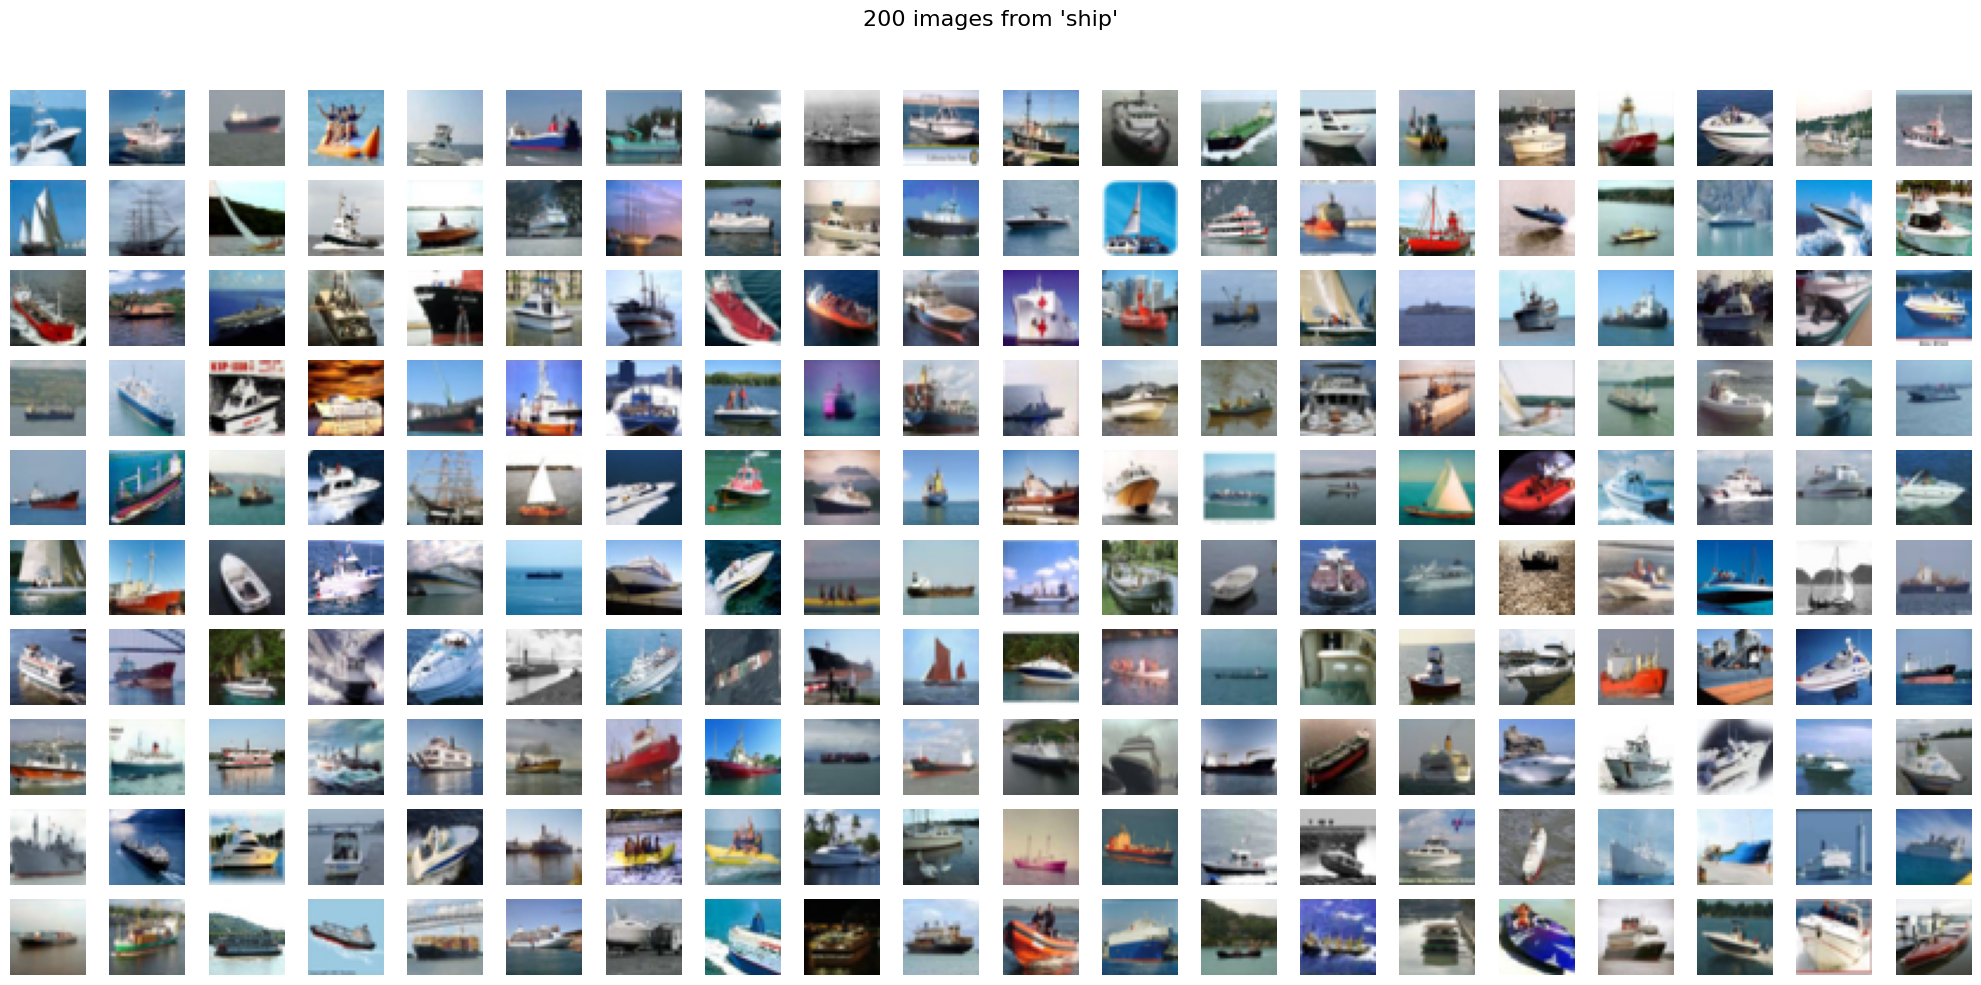

In [ ]:
# Step 1. Data Collection: CIFAR-10 dataset with target classes using cat, horse, and ship
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

target_classes = ['cat', 'horse', 'ship']
target_class_indices = [class_names.index(name) for name in target_classes]

transform = transforms.ToTensor()
dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True,
    transform=transform
)

selected_indices = []
class_counts = {idx: 0 for idx in target_class_indices}

for i, (img, label) in enumerate(dataset):
    if label in target_class_indices and class_counts[label] < 200:
        selected_indices.append(i)
        class_counts[label] += 1
    if all(count == 200 for count in class_counts.values()):
        break

subset = Subset(dataset, selected_indices)

def plot_images(indices, title, dataset, rows=10, cols=20):
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    fig.suptitle(title, fontsize=16)
    for i, idx in enumerate(indices):
        img, _ = dataset[idx]
        img = img.permute(1, 2, 0)
        row, col = divmod(i, cols)
        axes[row][col].imshow(img)
        axes[row][col].axis('off')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

class_image_indices = {name: [] for name in target_classes}
for i, (img, label) in enumerate(dataset):
    if class_names[label] in target_classes:
        class_image_indices[class_names[label]].append(i)

for class_name in target_classes:
    plot_images(class_image_indices[class_name][:200], f"200 images from '{class_name}'", dataset)


In [ ]:
# Flatten images
images = []
labels = []

for idx in selected_indices:
    img, label = dataset[idx]
    img = img.numpy().transpose(1, 2, 0).reshape(-1)
    images.append(img)
    labels.append(label)

X = np.array(images)
y = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Step 2. Preprocessing: Normalize the data, Standard Scaler and Robust Scaler will be compared
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# StandardScaler Pipeline
pipe_std = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),
    ('clf', SVC())
])

# RobustScaler Pipeline
pipe_robust = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=50)),
    ('clf', SVC())
])


In [ ]:
# Step 3. Dimensionality Reduction: PCA applied
# Explained variance for StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_

print(f"Variance explained by first 2 components: {np.sum(explained_variance[:2]):.4f}")
print(f"Variance explained by first 10 components: {np.sum(explained_variance[:10]):.4f}")
print(f"Variance explained by first 50 components: {np.sum(explained_variance[:50]):.4f}")

Variance explained by first 2 components: 0.3449
Variance explained by first 10 components: 0.6435
Variance explained by first 50 components: 0.8659


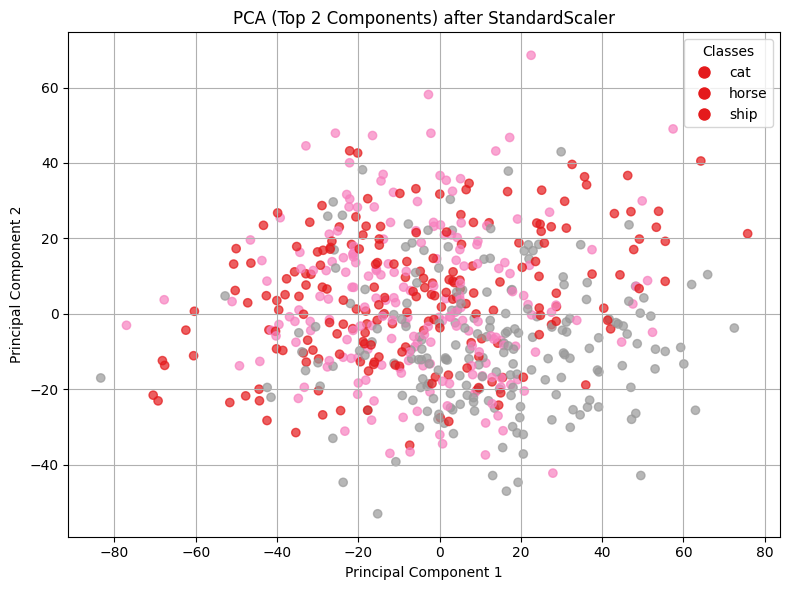

In [ ]:
# StandardScaler & PCA (2 components)
scaler_std = StandardScaler()
X_scaled_std = scaler_std.fit_transform(X)

pca_std = PCA(n_components=2)
X_pca_std = pca_std.fit_transform(X_scaled_std)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_std[:, 0], X_pca_std[:, 1], c=y, cmap='Set1', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (Top 2 Components) after StandardScaler")

class_labels = ['cat', 'horse', 'ship']
handles = [plt.Line2D([], [], marker='o', color='w', label=label,
                      markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
           for i, label in enumerate(class_labels)]
plt.legend(handles=handles, title="Classes")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Explained variance for RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_

print(f"  Variance explained by first 2 components: {np.sum(explained_variance[:2]):.4f}")
print(f"  Variance explained by first 10 components: {np.sum(explained_variance[:10]):.4f}")
print(f"  Variance explained by first 50 components: {np.sum(explained_variance[:50]):.4f}")

  Variance explained by first 2 components: 0.3389
  Variance explained by first 10 components: 0.6403
  Variance explained by first 50 components: 0.8650


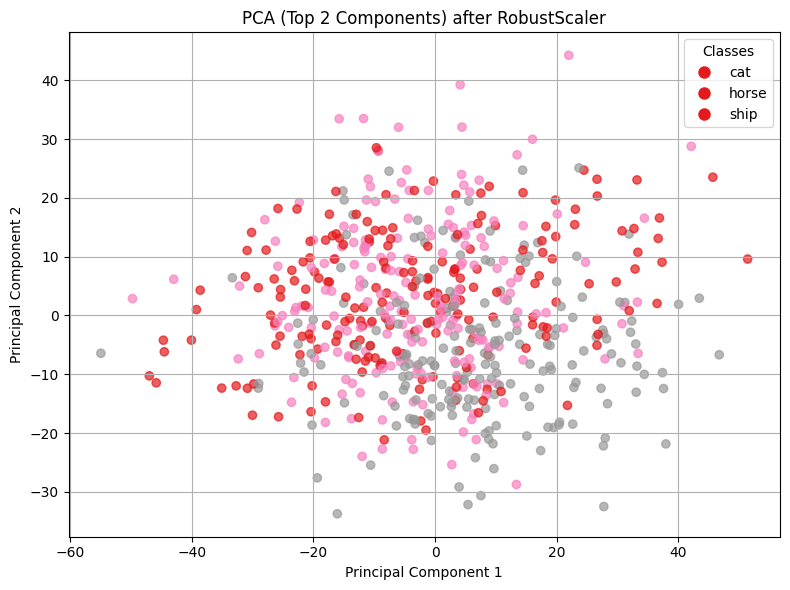

In [ ]:
# RobustScaler & PCA (2 components)
scaler_rob = RobustScaler()
X_scaled_rob = scaler_rob.fit_transform(X)

pca_rob = PCA(n_components=2)
X_pca_rob = pca_rob.fit_transform(X_scaled_rob)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_rob[:, 0], X_pca_rob[:, 1], c=y, cmap='Set1', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (Top 2 Components) after RobustScaler")

handles = [plt.Line2D([], [], marker='o', color='w', label=label,
                      markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
           for i, label in enumerate(class_labels)]
plt.legend(handles=handles, title="Classes")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Step 4. Model training: Choose 2 classifiers - SVM and KNN
from sklearn.neighbors import KNeighborsClassifier

# SVM Pipeline with StandardScaler
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),
    ('clf', SVC())
])

# KNN Pipeline with StandardScaler
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])

pipeline_svm.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)

print("SVM Accuracy:", pipeline_svm.score(X_test, y_test))
print("KNN Accuracy:", pipeline_knn.score(X_test, y_test))

SVM Accuracy: 0.7333333333333333
KNN Accuracy: 0.6416666666666667


In [ ]:
# SVM Pipeline with RobustScaler
pipeline_svm = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=50)),
    ('clf', SVC())
])

# KNN Pipeline with RobustScaler
pipeline_knn = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=50)),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])

pipeline_svm.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)

print("SVM Accuracy:", pipeline_svm.score(X_test, y_test))
print("KNN Accuracy:", pipeline_knn.score(X_test, y_test))

SVM Accuracy: 0.7416666666666667
KNN Accuracy: 0.6166666666666667


In [ ]:
# Step 5. Hyperparameter Tuning: Cross Validation and Grid Search
# SVM Comparison
from sklearn.model_selection import GridSearchCV

# StandardScaler
pipeline_svm_std = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),
    ('clf', SVC())
])

# RobustScaler
pipeline_svm_robust = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=50)),
    ('clf', SVC())
])

param_grid_svm = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf']
}

grid_svm_std = GridSearchCV(pipeline_svm_std, param_grid=param_grid_svm, cv=5)
grid_svm_robust = GridSearchCV(pipeline_svm_robust, param_grid=param_grid_svm, cv=5)

grid_svm_std.fit(X_train, y_train)
grid_svm_robust.fit(X_train, y_train)

print("SVM with StandardScaler:")
print("Best parameters:", grid_svm_std.best_params_)
print("Test accuracy:", grid_svm_std.score(X_test, y_test))

print("SVM with RobustScaler:")
print("Best parameters:", grid_svm_robust.best_params_)
print("Test accuracy:", grid_svm_robust.score(X_test, y_test))

SVM with StandardScaler:
Best parameters: {'clf__C': 1, 'clf__kernel': 'rbf'}
Test accuracy: 0.7333333333333333
SVM with RobustScaler:
Best parameters: {'clf__C': 1, 'clf__kernel': 'rbf'}
Test accuracy: 0.7416666666666667


In [ ]:
# KNN Comparison

# StandardScaler
pipeline_knn_std = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),
    ('clf', KNeighborsClassifier())
])

# RobustScaler
pipeline_knn_robust = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=50)),
    ('clf', KNeighborsClassifier())
])

param_grid_knn = {
    'clf__n_neighbors': [3, 5, 7]
}

grid_knn_std = GridSearchCV(pipeline_knn_std, param_grid=param_grid_knn, cv=5)
grid_knn_robust = GridSearchCV(pipeline_knn_robust, param_grid=param_grid_knn, cv=5)

grid_knn_std.fit(X_train, y_train)
grid_knn_robust.fit(X_train, y_train)

print("KNN with StandardScaler:")
print("Best parameters:", grid_knn_std.best_params_)
print("Test accuracy:", grid_knn_std.score(X_test, y_test))

print("KNN with RobustScaler:")
print("Best parameters:", grid_knn_robust.best_params_)
print("Test accuracy:", grid_knn_robust.score(X_test, y_test))

KNN with StandardScaler:
Best parameters: {'clf__n_neighbors': 5}
Test accuracy: 0.6416666666666667
KNN with RobustScaler:
Best parameters: {'clf__n_neighbors': 5}
Test accuracy: 0.6166666666666667


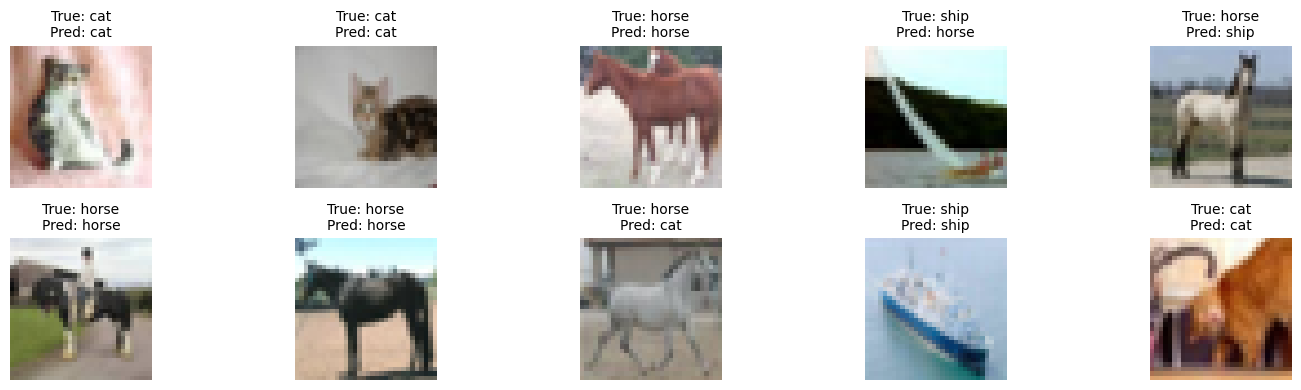

In [ ]:
# Step 7. Visualization: Plot first 10 images
model = grid_svm_std.best_estimator_

y_pred = model.predict(X_test)

class_names = ['cat', 'horse', 'ship']
target_class_indices = [3, 7, 8]

plt.figure(figsize=(15, 4))
for i in range(10):
    img = X_test[i].reshape(32, 32, 3)

    img = (img * 255).astype(np.uint8)

    true_label = class_names[target_class_indices.index(y_test[i])]
    predicted_label = class_names[target_class_indices.index(y_pred[i])]

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Classificaiton Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))


              precision    recall  f1-score   support

         cat       0.63      0.80      0.70        40
       horse       0.74      0.65      0.69        40
        ship       0.88      0.75      0.81        40

    accuracy                           0.73       120
   macro avg       0.75      0.73      0.74       120
weighted avg       0.75      0.73      0.74       120



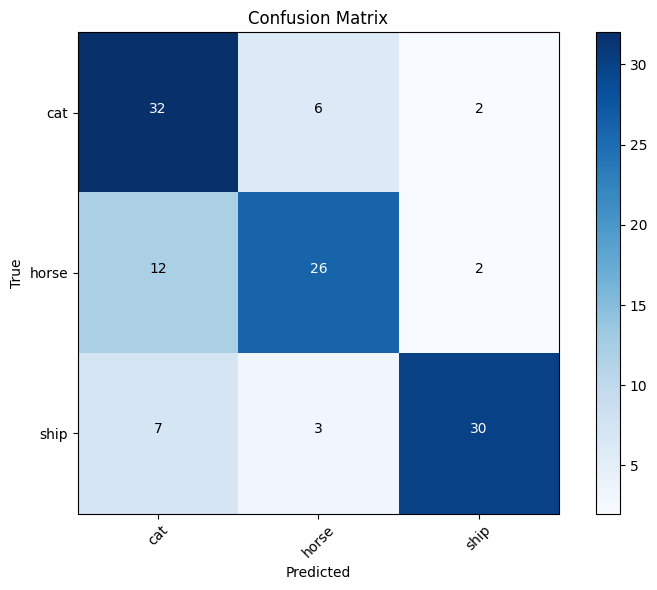

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

class_names = ['cat', 'horse', 'ship']

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()
